In [2]:
from csvtohdf import parse_data, get_data, get_location
from pathlib import Path
import os
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import logging

In [3]:
logging.basicConfig(filename='runtime.log', format='%(asctime)s %(levelname)s %(threadName)-10s %(message)s', level=logging.INFO)

In [4]:
CWD = Path.cwd()
HOME_DIR = CWD.home()
# DATA_FOLDER = HOME_DIR.joinpath("ED_Data")
DATA_FOLDER = CWD.joinpath("brocoli_data/ED_Data")
DEST_PATH = HOME_DIR.joinpath("server","data.hdf5")

In [5]:
dfs = []
measurements = {}

In [6]:
for root, dirs, files in os.walk(str(DATA_FOLDER)):
    for filename in files:
        if filename.endswith('.csv'):
            ret = parse_data(DATA_FOLDER.joinpath(filename), str(DEST_PATH), filename)
            data = get_data(**ret)
            try:
                key = data.pop()
                key = key.strftime("%Y-%m-%d")
                key = str(key)
                measurements[key] = measurements.get(key, []) + [data]
            except:
                pass


In [7]:
dfs = []
for val in measurements.values():
    df = pd.DataFrame(data= val, columns=['SITE', 'TIMESTAMP', 'RSSI', 'START', 'STEP',
        'geom'])
    if df.empty:
        continue
    df["address"] = df['geom'].apply(get_location)
    dfs.append(df)

In [8]:
data = pd.concat(dfs,ignore_index=True, sort=False)

In [9]:
data.head(10)

,SITE,TIMESTAMP,RSSI,START,STEP,geom,address
0,ASTI,2020-12-11 17:50:05,"[-94.4, -95.2, -93.8, -94.2, -88.0, -88.0, -90...",400.0,0.2,"(14.647179, 121.072005)","Advanced Science and Technology Institute, Car..."
1,NRTDC,2020-12-11 20:10:06,"[-82.0, -81.9, -82.8, -85.0, -96.1, -93.8, -92...",400.0,0.2,"(14.505025, 124.851131)",0
2,NRTDC,2020-12-11 03:40:06,"[-104.3, -95.6, -94.4, -96.5, -105.2, -108.6, ...",400.0,0.2,"(14.505025, 124.851131)",0
3,ASTI,2020-12-11 13:50:05,"[-85.9, -87.4, -93.6, -98.2, -97.6, -104.5, -1...",400.0,0.2,"(14.647179, 121.072005)","Advanced Science and Technology Institute, Car..."
4,NRTDC,2020-12-11 21:50:06,"[-86.1, -87.8, -90.5, -89.1, -95.1, -95.4, -91...",400.0,0.2,"(14.505025, 124.851131)",0
5,NRTDC,2020-12-11 18:50:06,"[-87.6, -91.0, -82.4, -80.9, -91.5, -95.0, -87...",400.0,0.2,"(14.505025, 124.851131)",0
6,ASTI,2020-12-11 21:20:05,"[-94.4, -95.7, -98.9, -100.6, -96.2, -106.8, -...",400.0,0.2,"(14.647179, 121.072005)","Advanced Science and Technology Institute, Car..."
7,ASTI,2020-12-11 10:10:05,"[-91.2, -93.2, -101.3, -100.6, -90.2, -84.9, -...",400.0,0.2,"(14.647179, 121.072005)","Advanced Science and Technology Institute, Car..."
8,ASTI,2020-12-11 06:30:05,"[-101.8, -95.7, -96.1, -97.2, -94.3, -96.5, -1...",400.0,0.2,"(14.647179, 121.072005)","Advanced Science and Technology Institute, Car..."
9,NRTDC,2020-12-11 15:40:07,"[-84.4, -86.0, -90.3, -93.6, -95.6, -97.4, -87...",400.0,0.2,"(14.505025, 124.851131)",0


In [10]:
loc = data['geom'].unique()[0]
data['address'].unique()[0]

'Advanced Science and Technology Institute, Carlos P. Garcia Avenue, Village B, UP Campus, Diliman, 4th District, Quezon City, Metro Manila, 1101, Philippines'

In [11]:
data.sort_values(by = 'TIMESTAMP').head()

,SITE,TIMESTAMP,RSSI,START,STEP,geom,address
1958,NRTDC,2020-09-28 20:40:05,"[-92.5, -92.1, -95.3, -100.7, -108.3, -107.2, ...",400.0,0.2,"(14.505025, 124.851131)",0
1957,NRTDC,2020-09-28 22:00:05,"[-94.8, -92.9, -91.5, -90.8, -99.3, -94.8, -94...",400.0,0.2,"(14.505025, 124.851131)",0
678,NRTDC,2020-09-29 03:50:05,"[-96.2, -102.1, -107.5, -101.6, -99.8, -98.7, ...",400.0,0.2,"(14.505025, 124.851131)",0
667,NRTDC,2020-09-29 04:10:05,"[-30.0, -30.0, -30.0, -30.0, -30.0, -30.0, -30...",400.0,0.2,"(14.505025, 124.851131)",0
675,NRTDC,2020-09-29 06:00:05,"[-93.4, -94.8, -98.6, -103.0, -98.6, -93.0, -9...",400.0,0.2,"(14.505025, 124.851131)",0


In [12]:
dates = data['TIMESTAMP'].apply(lambda st: datetime.datetime(year = st.year, month = st.month, day = st.day)).unique()
min(dates)

numpy.datetime64('2020-09-28T00:00:00.000000000')

In [13]:
filter_loc = data[data['geom'] == loc]

In [14]:
filter_date = filter_loc['TIMESTAMP'].apply(lambda st: st.year == 2020 and st.month == 12 and st.day == 11)

In [15]:
new_df = filter_loc[filter_date]
vals = pd.DataFrame.from_dict(dict(zip(new_df.RSSI.index, new_df.RSSI.values)))

In [16]:
new_index = np.arange(new_df.START[0], new_df.START[0] + (new_df.STEP[0] * new_df.RSSI[0].size) ,new_df.STEP[0])

In [52]:
vals.index = new_index
vals.columns = new_df.TIMESTAMP
#vals = vals.applymap(lambda x: -90 if x < -90 else x)
#d_csv = vals.to_csv()
str(vals.columns[0])

'2020-12-11 17:50:05'

Text(0, 0.5, 'Power (dBm)')

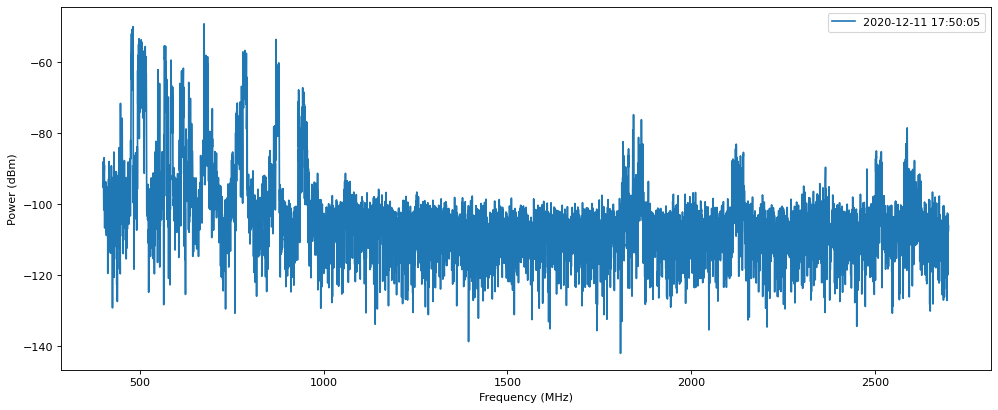

In [55]:
plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(vals[vals.columns[0]])
plt.legend([str(vals.columns[0])])
plt.xlabel('Frequency (MHz)')
plt.ylabel('Power (dBm)')